In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('iris_short.csv')
data_np = data.values

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [4]:
np.random.shuffle(data_np)

In [5]:
X = data_np[:,2:-1]

In [6]:
X

array([[3.9, 1.2],
       [4.0, 1.0],
       [4.5, 1.5],
       [3.6, 1.3],
       [5.6, 2.2],
       [3.3, 1.0],
       [5.9, 2.3],
       [5.1, 2.3],
       [5.1, 1.9],
       [5.1, 1.5],
       [5.5, 1.8],
       [4.0, 1.3],
       [4.8, 1.8],
       [4.8, 1.8],
       [3.9, 1.4],
       [3.5, 1.0],
       [5.0, 2.0],
       [6.9, 2.3],
       [5.3, 1.9],
       [6.4, 2.0],
       [4.5, 1.6],
       [6.7, 2.0],
       [4.1, 1.0],
       [4.7, 1.2],
       [6.1, 1.9],
       [4.0, 1.3],
       [5.6, 1.8],
       [4.1, 1.3],
       [4.5, 1.5],
       [5.6, 1.4],
       [4.5, 1.7],
       [5.9, 2.1],
       [5.1, 1.6],
       [5.6, 2.1],
       [6.6, 2.1],
       [4.7, 1.4],
       [4.6, 1.3],
       [5.1, 1.9],
       [5.0, 1.5],
       [6.7, 2.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.5, 1.5],
       [4.2, 1.3],
       [5.1, 2.4],
       [5.0, 1.9],
       [5.1, 1.8],
       [4.4, 1.2],
       [3.5, 1.0],
       [4.7, 1.6],
       [6.0, 1.8],
       [5.5, 1.8],
       [5.8,

In [7]:
y = data_np[:,-1]

In [8]:
y

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # categorical 변수의 값을 숫자로 변환하는데 사용
input_classes =['versicolor','virginica']
le.fit(input_classes)
y = le.transform(y)

In [10]:
y

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf=DecisionTreeClassifier(max_depth=2)

In [13]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [14]:
tree_clf.score(X_test, y_test)

0.9

## 시각화

1) using plot_tree from sklearn

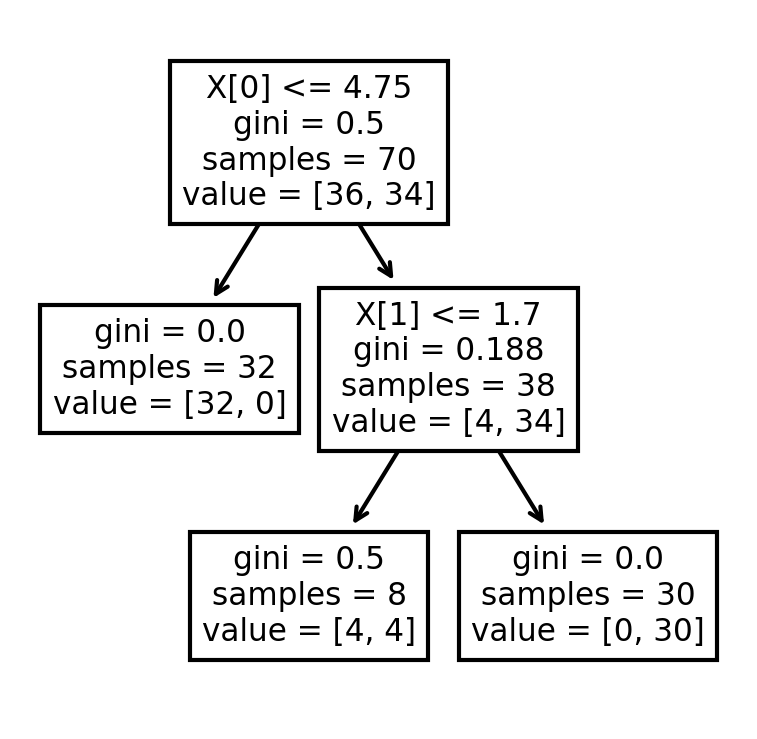

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tree_clf)
plt.show()
fig.savefig('tree.png')

## 새로운 값 예측

In [16]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.5, 0.5]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([0])

## Grid Search 사용하기

In [18]:
tree_clf1=DecisionTreeClassifier(criterion = 'gini')

In [19]:
from sklearn.model_selection import GridSearchCV
tree_params = {
    'max_depth' : [2,3,4,5],
#     'min_samples_split':[2,5,10,15]
}

In [20]:
grid_search = GridSearchCV(tree_clf1, param_grid=tree_params, cv=5, refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5]})

In [21]:
grid_search.best_params_
# Best hyperparameter의 값들을 return 합니다.

{'max_depth': 3}

In [22]:
best_model = grid_search.best_estimator_
# Best estimator (모형)을 return합니다. 
y_preds = best_model.predict(X_test)

In [23]:
best_model.score(X_train, y_train)

0.9857142857142858

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9

In [25]:
best_model.score(X_test, y_test)

0.9